
# Who Survived the Titanic Disaster?

## 1. Introduction

In this titanic example we will use decision trees. The main advantage of this model is that humans can easily 
understand and reproduce the sequence of decisions taken to predict the target class of a new data point.

This is very important for tasks such as medical diagnosis or credit approval, where we want to show a reason for the 
decision, rather than just saying this is what the training data suggests (which is, by definition, what every supervised 
learning method does).

The problem we would like to solve is to determine if a Titanic's passenger would have survived, given age, passenger class, 
and sex. Why these features? 

Answer: Very specific features (name is an extreme case) could result in overfitting (consider a tree that just asks if the name is X, she survived). Features for which there are a small number of instances with each value present a similar problem. They might not be useful for generalization. We will use class, age, and sex because a priori, we expect them to have possibly influenced the passenger's survival.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Prepare Dataset with Pandas 

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. 

In [157]:
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

#Show the first 10 rows.
df_titanic = pd.read_csv("Titanic.csv")
df_titanic.columns =['passengers','pclass','survived','name','age','embarked','home/dest','room','ticket','boat','sex']
df_titanic.head(10)

numpy version: 1.21.5
matplotlib version: 1.4.4


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male


Also show the 10 last rows. What is the problem in the last couple of rows?


In [158]:
## Your code ...
df_titanic.tail(10)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
1303,1304,3rd,0,"Yasbeck, Mr Antoni",NaN,NaN,NaN,NaN,NaN,NaN,male
1304,1305,3rd,1,"Yasbeck, Mrs Antoni",NaN,NaN,NaN,NaN,NaN,NaN,female
1305,1306,3rd,0,"Youssef, Mr Gerios",NaN,NaN,NaN,NaN,NaN,NaN,male
1306,1307,3rd,0,"Zabour, Miss Hileni",NaN,NaN,NaN,NaN,NaN,NaN,female
1307,1308,3rd,0,"Zabour, Miss Tamini",NaN,NaN,NaN,NaN,NaN,NaN,female
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


### 2.2. Investigate Dataset

How does Pandas interpret the data? The following 3 commands can be used to investigate the data. Describe in your own words what the command does.

In [159]:
df_titanic.dtypes


passengers      int64
pclass         object
survived        int64
name           object
age           float64
embarked       object
home/dest      object
room           object
ticket         object
boat           object
sex            object
dtype: object

In [160]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   passengers  1313 non-null   int64  
 1   pclass      1313 non-null   object 
 2   survived    1313 non-null   int64  
 3   name        1313 non-null   object 
 4   age         633 non-null    float64
 5   embarked    821 non-null    object 
 6   home/dest   754 non-null    object 
 7   room        77 non-null     object 
 8   ticket      69 non-null     object 
 9   boat        347 non-null    object 
 10  sex         1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [161]:
df_titanic.describe()



,passengers,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


In [162]:
# Slice the first 10 rows of the 'age' column. 

## Your code ...
df_titanic.loc[:10]

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male


In [163]:
# What kind of object is this 'age' column?   
type(df_titanic['age'])

# Note: Single column is neither an numpy array, nor a pandas dataframe but rather a pandas-specific object called 
# data Series.

pandas.core.series.Series

In [164]:
# What is the average age over all passengers?

## Your code ...
average = df_titanic['age'].mean()
average

31.19418104265403

In [165]:
# The next thing we'd like to do is look at more specific subsets of the dataframe. Slice the columns 'sex', 'pclass', 
# and 'age'.

## Your code ...
df_titanic[['sex','pclass','age']].head(10)

,sex,pclass,age
0,female,1st,29.0000
1,female,1st,2.0000
2,male,1st,30.0000
3,female,1st,25.0000
4,male,1st,0.9167
5,male,1st,47.0000
6,female,1st,63.0000
7,male,1st,39.0000
8,female,1st,58.0000
9,male,1st,71.0000


In [166]:
# First look at all of the missing 'age' values, because we will need to address them in our model if we hope to use 
# all the data for more advanced algorithms. To filter for missing values you can use:
df_titanic[df_titanic['age'].isnull()][['sex', 'pclass', 'age']]

# Here the only thing we did was print all (680) cases, but the same syntax can be used later if we take action on them.

,sex,pclass,age
12,female,1st,NaN
13,male,1st,NaN
14,male,1st,NaN
29,male,1st,NaN
32,male,1st,NaN
...,...,...,...
1308,male,3rd,NaN
1309,male,3rd,NaN
1310,male,3rd,NaN
1311,female,3rd,NaN


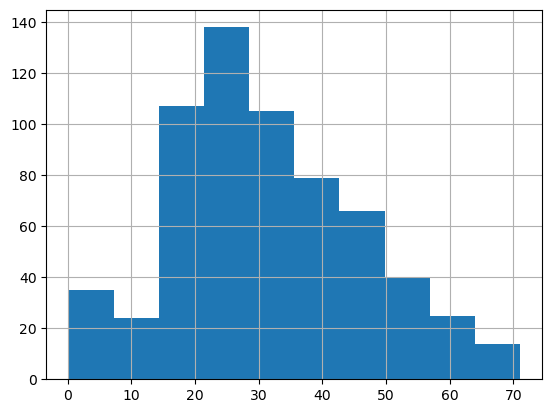

In [167]:
# Before we finish the initial investigation, let's use one other convenience function of pandas to derive a 
# histogram of any numerical column. 
import pylab as pyl
df_titanic['age'].hist()
pyl.show()

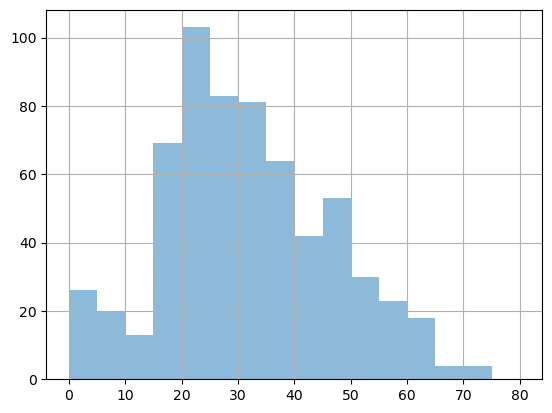

In [168]:
# Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke 
# it, you can also be explicit that you are dropping the missing values of age:
df_titanic['age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
pyl.show()

## 3. Data Munging

### 3.1. Transform the Data 

Transform the values in the dataframe into the shape we need for machine learning. 

First of all, it's hard to run analysis on the string values of "male" and "female". 
Let's store this transformation into a new column 'Gender'. We have a precedent of analyzing the women first, so let's decide female = 0 and male = 1.  

In [169]:
# Let's store our transformation in a new column, so the original sex isn't changed.
#df_titanic['Gender'] = 4
df_titanic['Gender'] = df_titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_titanic.head(3)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,1


In [170]:
# Do the same for passenger class, make it numeric, in a new column PClass. 

## Your code ...
df_titanic['PClass'] = 5
df_titanic['PClass'] = df_titanic['pclass'].map( {'1st' : 1, '2nd' : 2, '3rd' : 3} ).astype(int)
df_titanic.head(3)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,1,1


In [171]:
# Show all males in the second class

df_titanic[(df_titanic['sex'] == 'female') & (df_titanic['pclass'] == '2nd')]

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass
323,324,2nd,1,"Abelson, Mrs Samuel (Anna)",28.0,Cherbourg,"Russia New York, NY",NaN,NaN,12,female,0,2
327,328,2nd,1,"Angle, Mrs William A. (Florence)",32.0,Southampton,"Warwick, England",NaN,NaN,NaN,female,0,2
331,332,2nd,1,"Balls, Mrs Ada E. Hall",36.0,Southampton,"Bristol, Avon / Jacksonville, FL",NaN,NaN,NaN,female,0,2
335,336,2nd,1,"Beane, Mrs Edward (Ethel Clarke)",19.0,Southampton,"Norwich / New York, NY",NaN,NaN,NaN,female,0,2
337,338,2nd,1,"Becker, Mrs Allen Oliver (Nellie E. Baumgardner)",36.0,Southampton,"Guntur, India / Benton Harbour, MI",NaN,230136 L39,11,female,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,2nd,1,"West, Mrs Edwy Arthur (Ada Mary)",33.0,Southampton,"Bournmouth, England",NaN,NaN,NaN,female,0,2
594,595,2nd,1,"Wilkinson, Mrs Elizabeth Anne",NaN,Southampton,"Manchester, England",NaN,NaN,NaN,female,0,2
596,597,2nd,1,"Wright, Miss Marion",26.0,Southampton,"Yoevil, England / Cottage Grove, OR",NaN,NaN,9,female,0,2
597,598,2nd,0,"Yrois, Miss Henriette",NaN,Southampton,Paris,NaN,NaN,NaN,female,0,2


### 3.2. Deal with Missing Values

Now it's time to deal with the missing values of age! Why? Simply because most machine learning will need a complete set of 
values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can 
keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall 
predictive power of age might still make a better model than before. 

We know the average age of all passengers (with valid age field) is 31.2 - we could fill in the null values with that mean value. But may be the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The age histogram did seem positively skewed. These are the kind of decisions you make as you create your models.

Replace the NaN (unknown) age values with a reasonable estimate. Do this in a new column 'AgeFill'

In [172]:
average_age = df_titanic['age'].mean()
average_age

df_titanic['AgeFill'] = 6
df_titanic['AgeFill'] = df_titanic['age'].fillna(average_age)
df_titanic.tail(10)


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass,AgeFill
1303,1304,3rd,0,"Yasbeck, Mr Antoni",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1304,1305,3rd,1,"Yasbeck, Mrs Antoni",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1305,1306,3rd,0,"Youssef, Mr Gerios",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1306,1307,3rd,0,"Zabour, Miss Hileni",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1307,1308,3rd,0,"Zabour, Miss Tamini",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181


#### Now use the mean age of male and female for each passenger class:

In [173]:
## Show mean per class and sex
df_titanic.loc[:,['sex', 'PClass', 'age']].groupby(['sex', 'PClass']).mean()

age
sex    PClass           
female 1       37.772277
       2       27.388235
       3       22.564328
male   1       41.199334
       2       28.910761
       3       25.327294

In [174]:
## Show the average of of each sex per passenger class.
df_titanic['AgeFillM'] = df_titanic.groupby(['sex', 'PClass'])['age'].apply(lambda x: x.fillna(x.mean()))

## Show last values again
df_titanic.tail(10)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass,AgeFill,AgeFillM
1303,1304,3rd,0,"Yasbeck, Mr Antoni",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181,25.327294
1304,1305,3rd,1,"Yasbeck, Mrs Antoni",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181,22.564328
1305,1306,3rd,0,"Youssef, Mr Gerios",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181,25.327294
1306,1307,3rd,0,"Zabour, Miss Hileni",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181,22.564328
1307,1308,3rd,0,"Zabour, Miss Tamini",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181,22.564328
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181,25.327294
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181,25.327294
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181,25.327294
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female,0,3,31.194181,22.564328
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male,1,3,31.194181,25.327294


### 3.3 Hot Encoding

We have a categorical feature attribute: pclass. We already converted its three classes into 0, 1, and 2. This transformation implicitly introduces an ordering. 

As a final step, we will try a more general approach that does not assume an ordering. This is widely used to convert categorical classes into real-valued attributes. We will introduce an additional encoder and convert the class attributes into three new binary features, each of them indicating if the instance belongs to a feature value (1) or (0). This is called one hot encoding, and it is a very common way of managing categorical attributes for real-based methods.

In [175]:
df_titanic['FirstClass'] = df_titanic['pclass'].map( {'1st': 1, '2nd': 0, '3rd': 0} ).astype(int)
df_titanic['SecondClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 1, '3rd': 0} ).astype(int)
df_titanic['ThirdClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 0, '3rd': 1} ).astype(int)

df_titanic.head(5)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,Gender,PClass,AgeFill,AgeFillM,FirstClass,SecondClass,ThirdClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1,29.0000,29.0000,1,0,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,2.0000,2.0000,1,0,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,1,1,30.0000,30.0000,1,0,0
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,25.0000,25.0000,1,0,0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1,0.9167,0.9167,1,0,0


## 4. Preprocessing

Let's start with feature selection

In [176]:
titanic_X = df_titanic[['AgeFillM','Gender','FirstClass','SecondClass','ThirdClass']]
titanic_y = df_titanic['survived']

In [177]:
titanic_X.head(10)

,AgeFillM,Gender,FirstClass,SecondClass,ThirdClass
0,29.0000,0,1,0,0
1,2.0000,0,1,0,0
2,30.0000,1,1,0,0
3,25.0000,0,1,0,0
4,0.9167,1,1,0,0
5,47.0000,1,1,0,0
6,63.0000,0,1,0,0
7,39.0000,1,1,0,0
8,58.0000,0,1,0,0
9,71.0000,1,1,0,0


In [178]:
titanic_y.head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

Now split the data into train and test

In [179]:
from sklearn.model_selection import train_test_split

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(titanic_X, titanic_y, test_size=0.2, random_state = 42)

## 5. Modeling

The preprocessing step is usually under-estimated in machine learning methods, but as we can see even in this very simple example, it can take some time to make data look as our methods expect. It is also very important in the overall machine learning process; if we fail in this step (for example, incorrectly encoding attributes, or selecting the wrong features), the following steps will fail, no matter how good the method we use for learning!!

We are now ready for the implementation of decision trees in scikit-learn, as this algo expects as input a list of 
real-valued features, and the decision rules of the model would be of the form: Feature < value. 
For example, AgeFill < 20.0.

Standardization (normalization) is not an issue for decision trees because the relative magnitude of features does not 
affect the classifier performance; so scaling is not needed.

### 5.1. Training a Decision Tree Classifier

 Now, we can create a new DecisionTreeClassifier and use the fit method of the classifier to do the learning job. 
 Parameter settings: use the entropy citerion and try out different settings for the depth of the tree and the 
 minimum samples required for a node in the tree graph

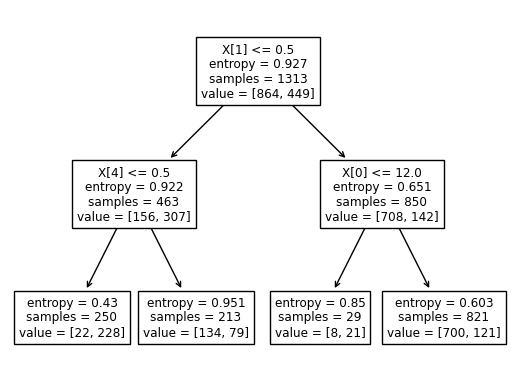

In [180]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, random_state = 42)
tree_clf.fit(titanic_X,titanic_y)

tree.plot_tree(tree_clf);

### 5.2. Evaluation Metrics Function

In [181]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test_titanic)
accuracy_score(y_test_titanic, y_pred)

0.8250950570342205

### 5.3. Keep age as the only feature and run decision tree classification again. Compare the evaluation.

### 5.4. Add embarked as the new feature with one hot encoding. Run the decision tree classification again. Compare the evaluation. Do you believe the model has been improved? Why?

## 6. Introducing Random Forest

A common criticism to decision trees is that once the training set is divided after
answering a question, it is not possible to *reconsider this decision*. For example, if
we divide men and women, every subsequent question would be only about men or
women, and the method could not consider another type of question (say, age less
than a year, irrespective of the gender). Random Forests try to introduce some level
of randomization in each step, proposing alternative trees and combining them to
get the final prediction. These types of algorithms that consider several classifiers
answering the same question are called **ensemble methods**. In the Titanic task, it is
probably hard to see this problem because we have very few features, but usually
a case has in the order of thousand(s) features.

Random Forests propose to build several decision trees, each one based on a subset of the training
instances (selected randomly), and using a small random number of features. 
This produces multiple classifiers (multiple decision trees). 
At prediction time, each grown tree, given an instance, predicts its target class exactly as decision trees do. 
The class that most of the trees vote (that is the class most predicted by the trees) is the one suggested by the ensemble classifier.

## 7. Implement Random Forest

Implement a Random Forest classifier. Can you improve to above accuracy? Look at the sklearn documentation. Play with the parameters of the ``RandomForestClassifier``. Especially the parameter ``n_estimators`` (the number of trees in the forest) is of interest.

In [182]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=2, random_state = 42, n_estimators = 30)
forest_clf.fit(titanic_X,titanic_y)
y_pred = forest_clf.predict(X_test_titanic)
accuracy_score(y_test_titanic, y_pred)

0.8174904942965779